# Session 2: Weather Data - OpenWeatherAPI

Immanuel Williams & Ciera Millard  
2025-07-10

# Session 2: API Fundamentals

## 1. Goals & Objectives

By the end of this session, participants will be able to:

1.  **Understand the foundational concepts of APIs** as a bridge for
    data exchange, including how they function in modern software and
    support real-time data extraction.

2.  **Query public APIs effectively**, forming well-structured requests
    that interact with remote databases and return meaningful results.

3.  **Interpret JSON responses**, with a focus on the **data** element,
    while also distinguishing between **metadata** and **status codes**.
    Develop an understanding of how HTTP status codes and API keys work
    to validate and secure data access.

4.  **Write clean, purposeful R code** to send API requests, handle
    responses, and parse structured data into tidy, analyzable formats.

## 2. Conceptual Foundation

Part A. Theoretical ideas of APIs

Note 1:

-   This is not a webdeveloper nor a CS course but with a decent
    understanding of the logic, you and your students will appreciate
    the utilizartion of web scrapiing more

### P1. What is an API (again)?

It is the ability for software to communicate

<figure>
<img
src="https://phoenixnap.com/kb/wp-content/uploads/2022/11/cloud-api-request-and-response.png"
alt="API Call (PhoenixNap.com)" />
<figcaption aria-hidden="true">API Call (PhoenixNap.com)</figcaption>
</figure>

-   Q1: What is its utility of APIs? (multiple choice)

Note 2:

-   This image is overly simplified in that a client left makes request
    through an api to a server/database then the server/database
    provides responses

-   A client and server can exist on the same computer. This is often
    what’s happening in local development (e.g., querying a local
    database from R)

### P2. API Logic

Lets go deeper into understanding Define:

Client (request) –\> API –\> Server –\> Database

Client \<– API \<– Server (response) \<– Database

<figure>
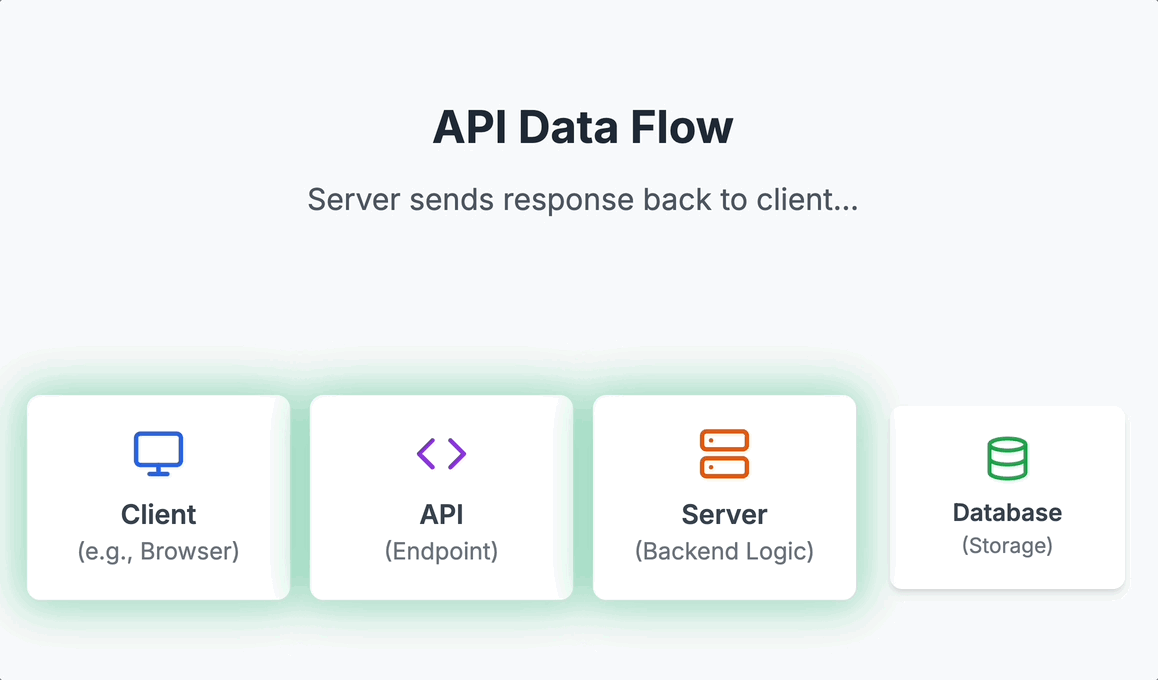
<figcaption aria-hidden="true">GATO365 API Request &amp;
Response</figcaption>
</figure>

Q2. Matching You might show this flow visually and say:

“The \[API\] is the waiter.”

“The \[client\] is the customer.”

“The \[server\] is the kitchen.”

“The \[database\] is the fridge or pantry.”

Note 3:

-   Action: Client makes a request

-   Action: Server queries Database provides a response

### P3. Requests and Responses

Lets spend some more time on the request and response

The client sends a `request` asking for info (like Taylor Swift or
today’s weather). This request includes:

-   A URL (e.g., with parameters like ?q=San+Luis+Obispo)
-   Possibly an API key
-   A method (e.g., GET or POST)

The request are in the form of a url string (more on this soon…)

The server then returns a `response` which contains:

-   data (temperature, artist name, forecast, etc.)
-   metadata (This is information about the response.)
-   status code (Tells you whether the request was successful)

This information is traditionally provided in JSON Format. (more on this
soon…)

### P4. Anatomy of JSON

-   Let’s focus on what the response is 1st (what we receive from the
    server):

-   Below is an example GIF of the information sent from the server in
    JSON format:

<figure>
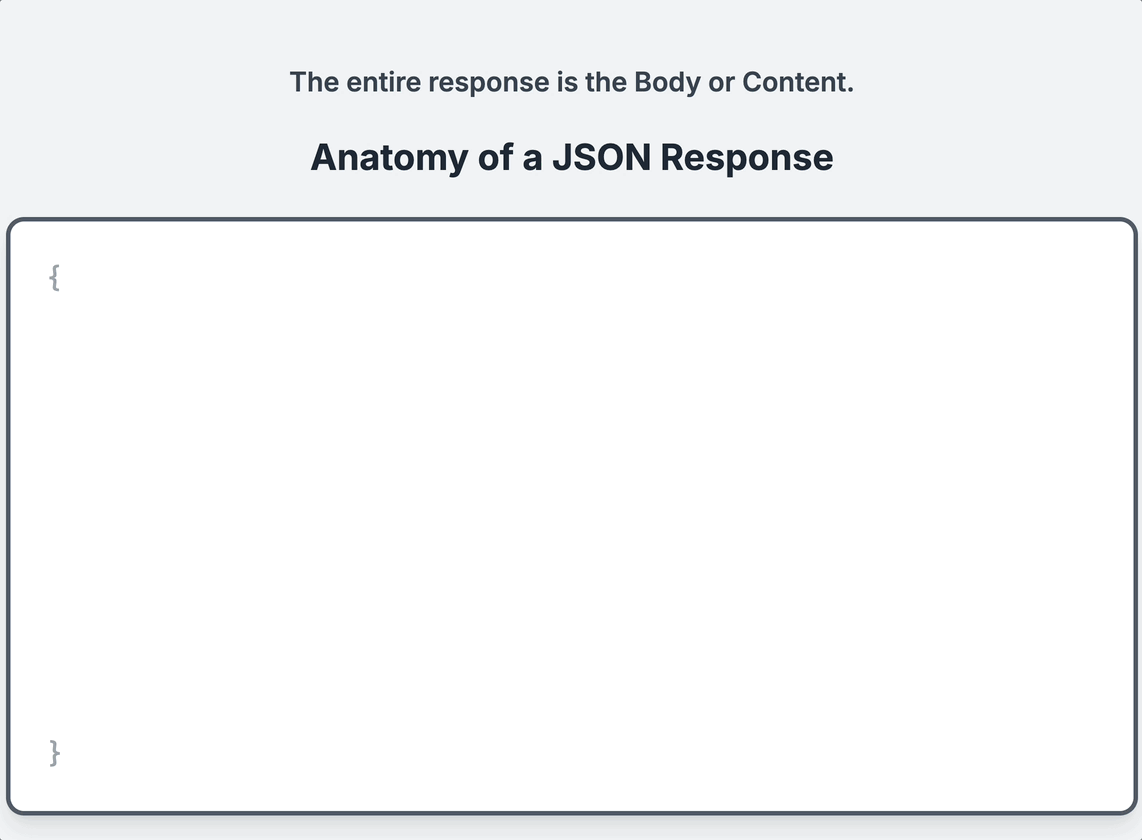
<figcaption aria-hidden="true">GATO365 Anatomy JSON</figcaption>
</figure>

Note 4:

-   When we send a request to an API, we get a response body, which
    includes the content — typically JSON — divided into data (what we
    wanted), metadata (info about the data), and a status_code telling
    us if the request worked.

### P5. Status Code

Status codes tell you what happened with your request:

-   100s: Info

-   200s: Success (highlight: 200 OK)

-   300s: Redirect

-   400s: Client error

-   500s: Server error

Note 5:

-   Emphasize: In most data APIs, your goal is to get a **200**
    response.
-   Use examples like making up a nonexistent city or artist to show how
    an API might respond with a 400 or 404. \|

\*\* Client Request \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

### P6. CRUD Framework

What type of client requests can we make?

**CRUD Framework** *(Create, Read, Update, Delete)*

-   Though APIs allow all four, **Read** (GET) is most common in data
    science.

-   RESTful API mapping:

    -   **Create → POST**

    -   **Read → GET**

    -   **Update → PUT/PATCH**

    -   **Delete → DELETE**

        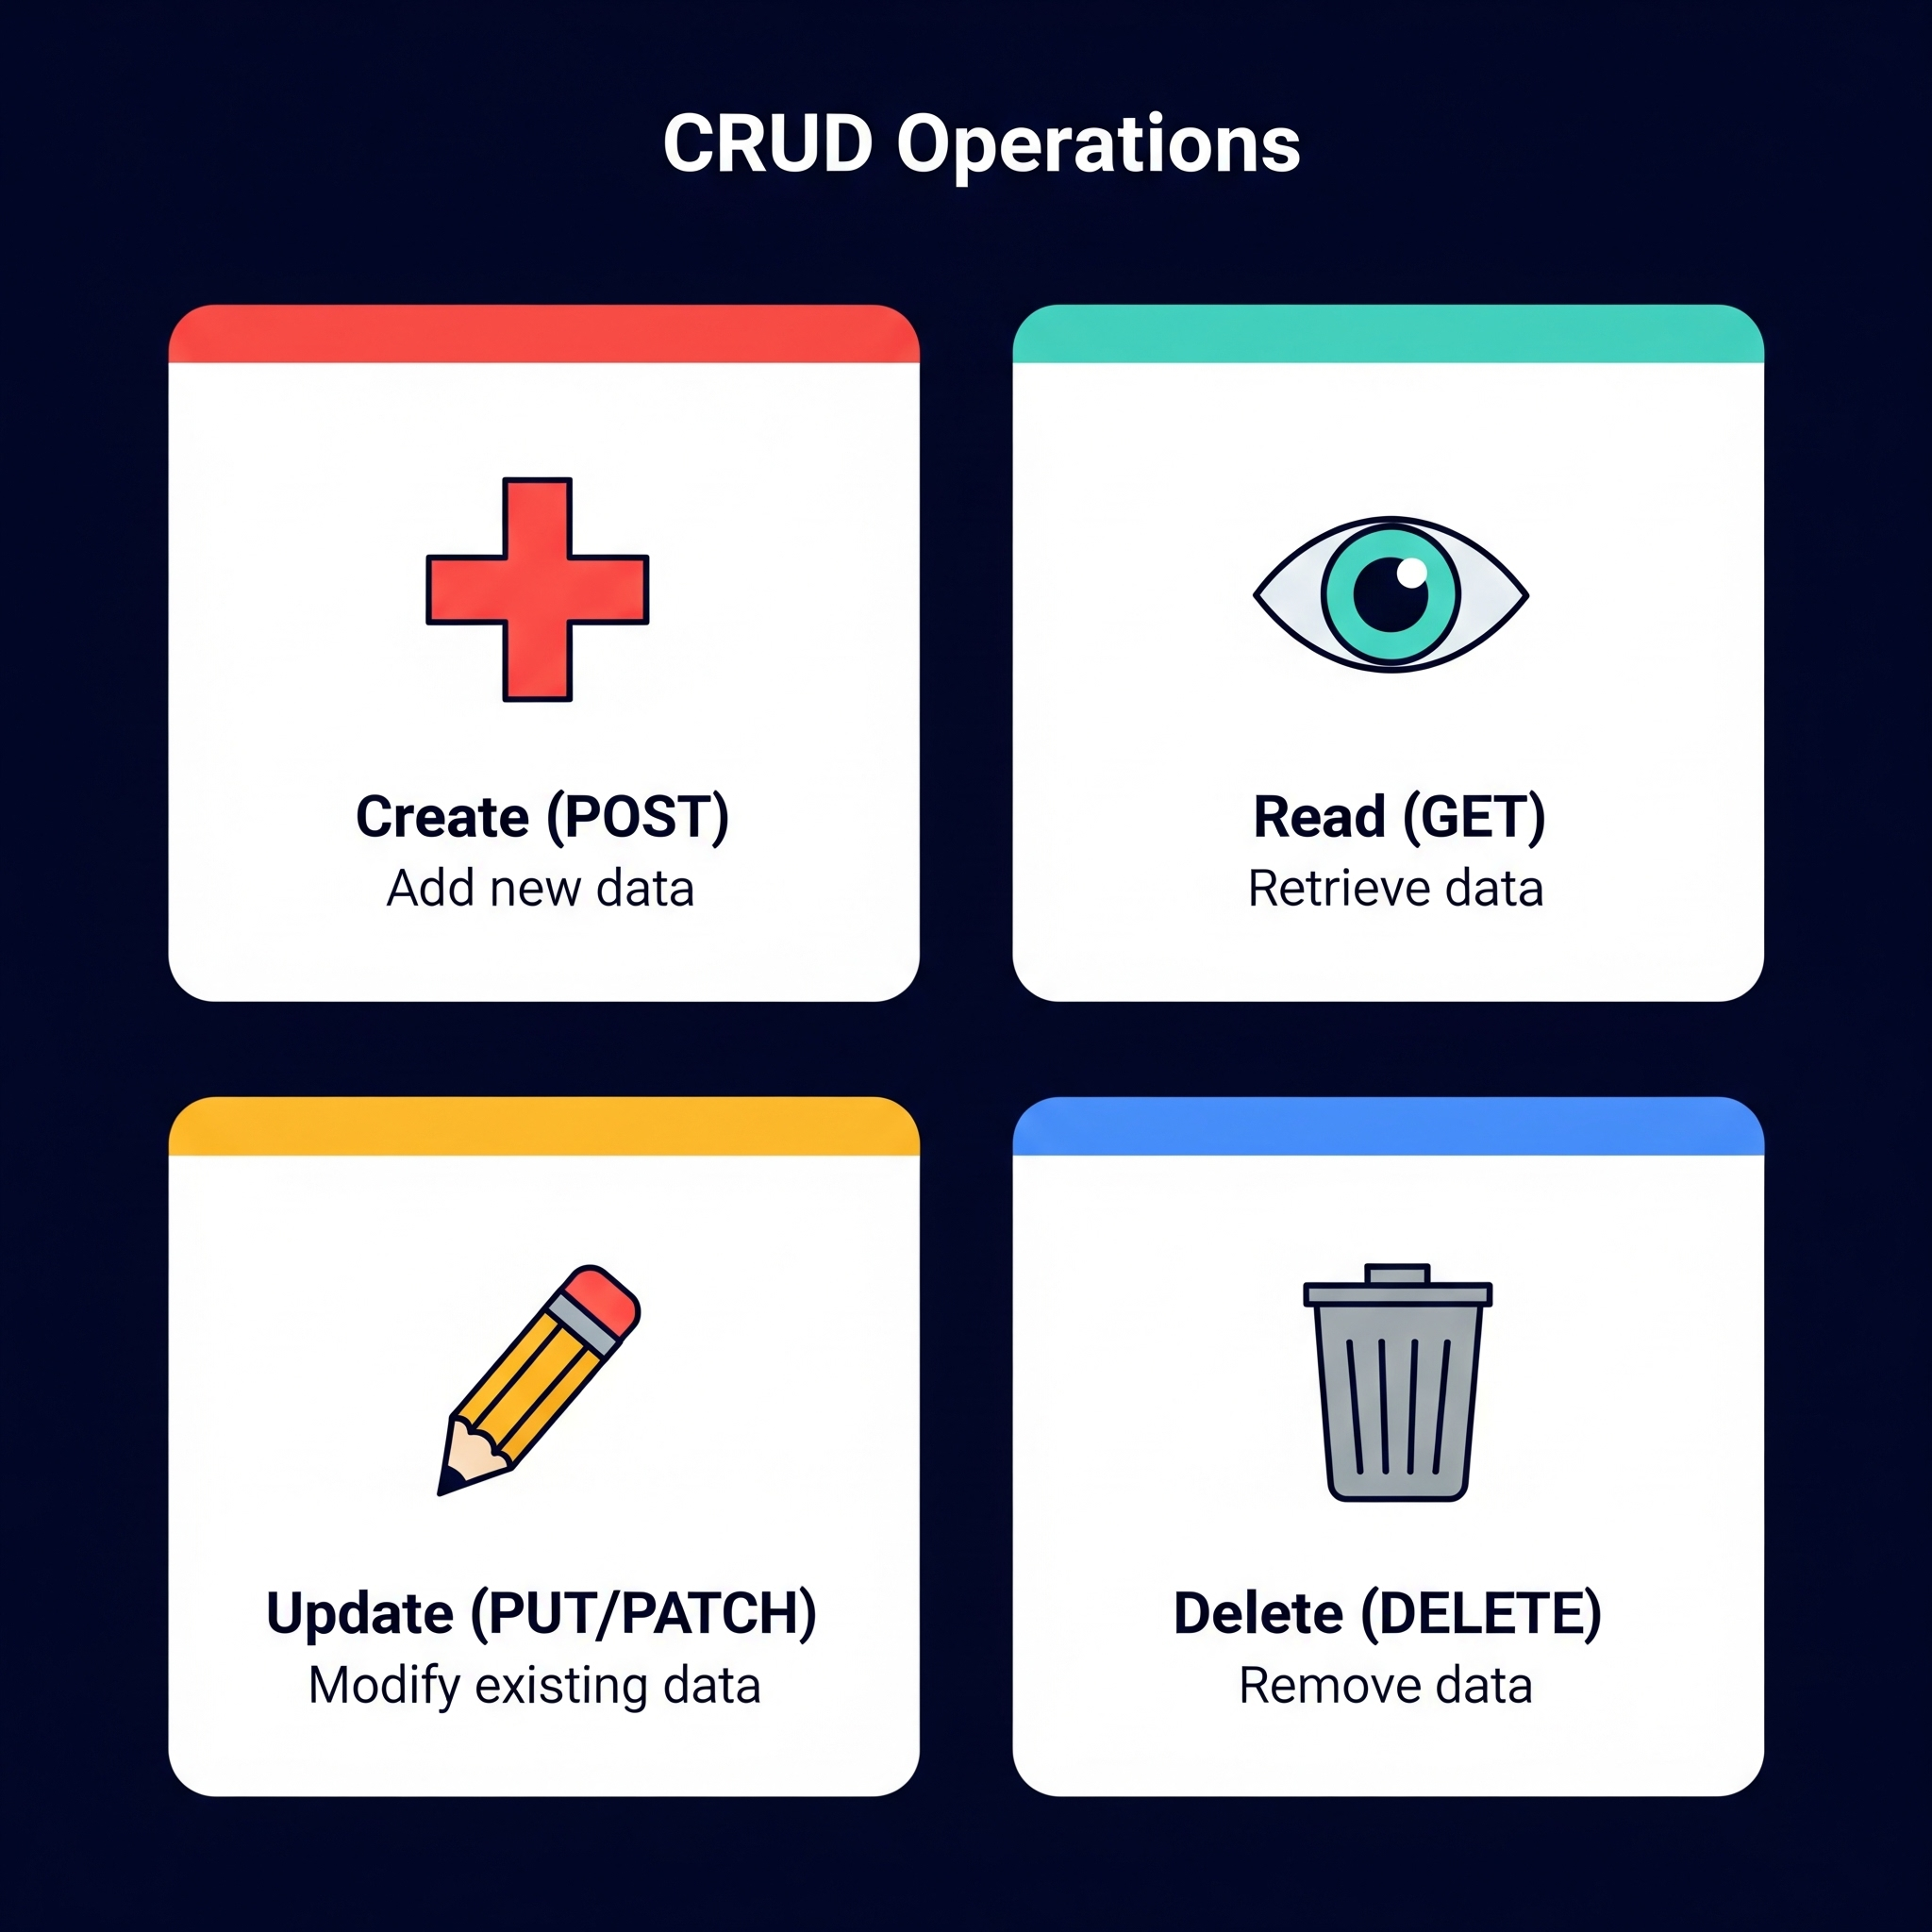

Notes:

-   **GET** retrieves existing data from a server.

-   **POST** submits new data to the server.

-   **UPDATE** modifies existing data on the server.

-   **DELETE** removes a resource from the server.

-   Sometimes we have to implement a post to be able to gain an access
    token

### P7. GET Request

<figure>
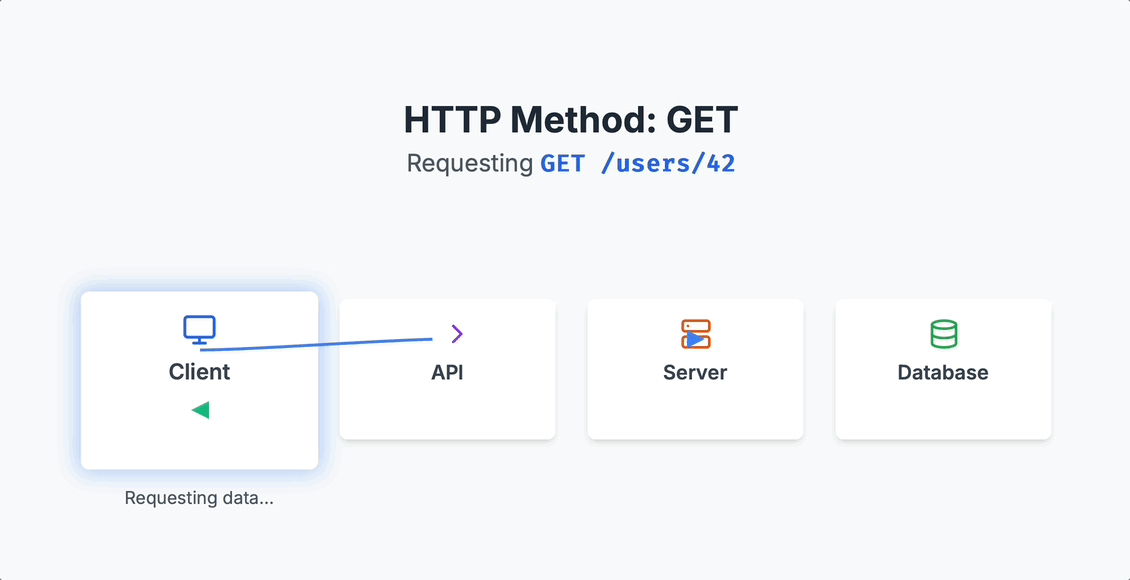
<figcaption aria-hidden="true">GATO365 Get Request</figcaption>
</figure>

Here is the description of a GET request from that perspective.

-   `Client` **constructs** a *request* for a *resource*.

-   `API` **receives** and **validates** the `client's` *request*.

-   `Server` **locates** the requested *data* within *database*.

-   `Client` **receives** requested *data* from the *server*.

### P8. Post Request

<figure>
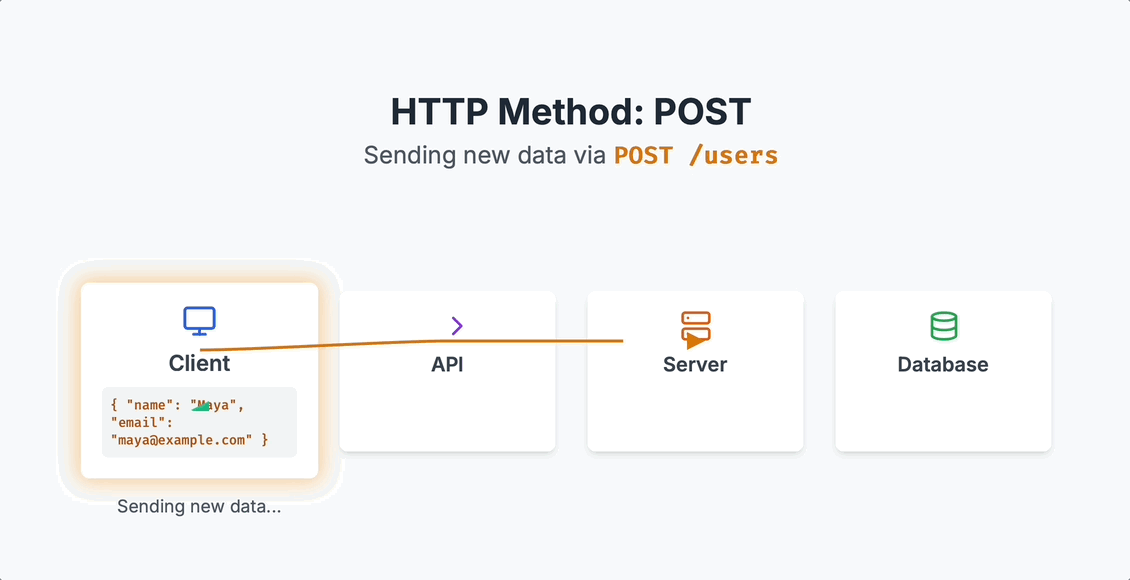
<figcaption aria-hidden="true">GATO365 Post Request</figcaption>
</figure>

-   Here is the description of a POST request.
    -   `Client` **sends** new *data* within the *request* `body`.

    -   `API` **receives** and **validates** the `client's` new *data*.

    -   `Server` **creates** a new *record* in the *database*.

    -   `Client` **receives** a *confirmation* for the new *record*.

### P9. Setup `API_Key`

------------------------------------------------------------------------

\[\[Based on time do One of the three steps\]\]

\[\[1. email attendees to go to the weather website and get API key or
whatever information needed before the conference. Create a video that’s
displaying how to do this\]\]

\[\[1a. Discuss .Renviron.txt, how we use: to create and edit API key:
`usethis::edit_r_environ()`\]\]

\[\[1b. Use `Sys.getenv("API_KEY")` to see API in console\]\]

\[\[Note that you have to use the 1a to see the api key again\]\]
Restart R

\[\[2. have attendees get the key during the break session if they have
not done so already\]\]

\[\[3. use a common key, but tell them it is bad practice\]\]

\[\[regardless of the decision made of the three options above have
attendees store information in the environment file\]\]

------------------------------------------------------------------------

Note 8:

There are many ways of doing this, but I’m going to stick with using
tidyverse functions.I’m going to show you two ways to actually implement
the query using the one way of one of the ways of doing this within a
tiny verse using string glue

### P10. Requests, URLs & Queries

-   So what we’re going to first do is create our request and the most
    ideal way.

-   A request <u>**defined by**</u> a **URL**, which contains both:

    -   The *endpoint* (base address of the API)
    -   The *query string* (additional key-value pairs that modify the
        request)

-   We often need to **glue strings together** to build this full URL
    dynamically.

-   A request is not “automatically” turned into JSON when sent — it’s
    the **response** that’s usually formatted as JSON. The request is
    often URL-encoded if it’s a GET.

Note:

-   An **endpoint** is the specific URL where an API can be accessed.
    Think of it as the main address for a particular set of resources.
    It’s the stable part of the URL that doesn’t change from one request
    to the next.

-   A **query string** is used to customize the request by filtering or
    specifying the exact data you want from an endpoint. It always
    starts with a question mark (`?`) and is made up of key-value pairs.

### P11: What Happens Under the Hood

-   When we use a URL like `...?q=San+Luis+Obispo&appid=...`, we’re
    constructing a **query string**, which is appended to the base URL.

-   Think of this as *“asking the question”*—the query string shapes the
    request.

-   The server receives the request, processes it, and **responds** with
    structured data (typically JSON).

-   We’re not sending JSON in this case—we’re sending a URL with
    parameters. JSON is **returned to us** as a response format.

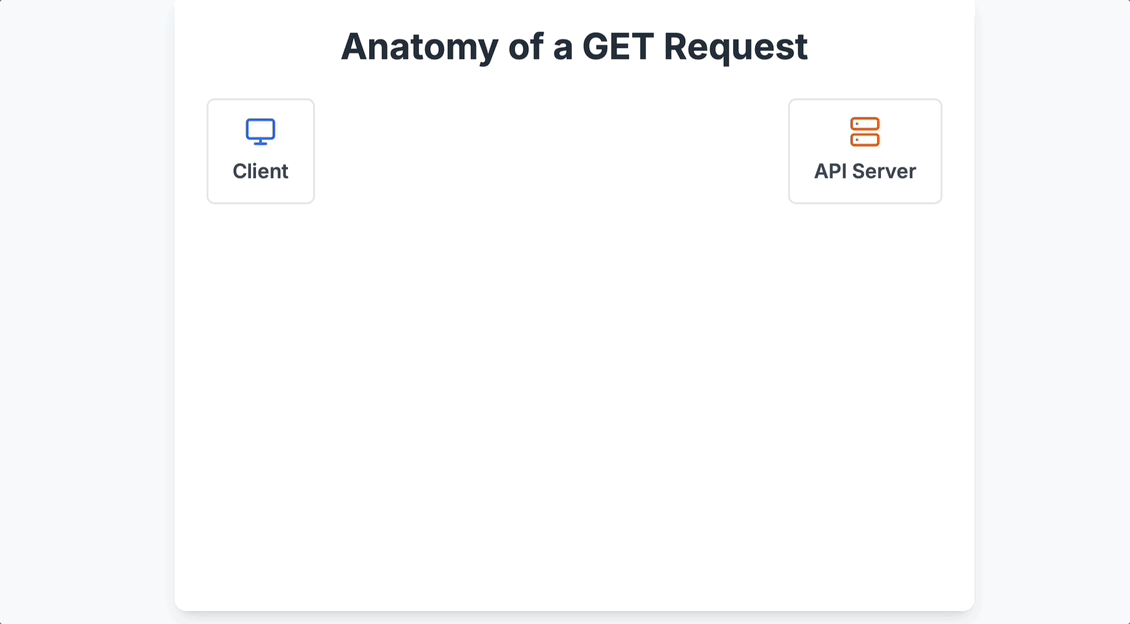 Note 9:

-   A **URL** is constructed from a **base URL** (the endpoint) and a
    **query string**.

-   The client sends a **GET request** using this URL to the API.

-   The API then relays this request to the server.

-   After processing the request, the server sends a **response**, which
    includes a status code and the requested data (often formatted as
    JSON), back to the client.

\[\[Transition to openweather API Requests\]\]

(TODO: Remove APIServer)

### P12. Two Ways to Build Request Objects

#### **Method 1: Manual String Gluing**

Load Libraries

In [ ]:
## EMPTY VERSION
# library(____)
# library(____)

In [ ]:
## FILLED RESPONSE
library(httr2)       # Makes web requests
library(glue)        # Glue Strings

Specify city to query

In [ ]:
## EMPTY VERSION
# city_name <- "____"

In [ ]:
## FILLED RESPONSE
city_name <- "San Luis Obispo"

Use this `url` as the base url,
`https://api.openweathermap.org/data/2.5/weather?` (Imporve Instructions
using empty and fill)

In [ ]:
## EMPTY VERSION
# current_weather_url <- glue("____",                        ## Base URL / Endpoint
#                             "q=", URLencode(____),         ## City Name
#                             "&appid=", Sys.getenv("____"), ## Use of API Key
#                             "&units=____")                 ## Specify the units

In [ ]:
## FILLED RESPONSE
current_weather_url <- glue("https://api.openweathermap.org/data/2.5/weather?",
                            "q=", URLencode(city_name),
                            "&appid=", Sys.getenv("API_KEY"),
                            "&units=imperial")

Note:

-   `Endpoint`: The base URL that specifies the location of the API
    resource you want to access.

-   `q`: The query parameter, used for the main search term (in this
    case, the city name).

-   `appid`: The parameter for your unique API key, which is used to
    authenticate your request.

-   `units=imperial`: A parameter that requests the API to return data
    in Imperial units (e.g., Fahrenheit).

-   `URLencode()`: A function that formats text, like city names with
    spaces, to be safely included in a URL.

-   **imperial**: A parameter that tells the API to return data in
    Imperial units (e.g., Fahrenheit).

Print the `url` string

In [ ]:
## EMPTY VERSION
# ____

In [ ]:
## FILLED RESPONSE
current_weather_url

Make the request formal

In [ ]:
## EMPTY VERSION
# req <- request(____)

In [ ]:
## FILLED RESPONSE
req <- request(current_weather_url)

Print the formal requst

In [ ]:
## EMPTY VERSION
# ____

In [ ]:
## FILLED RESPONSE
req

Note 13: Look at the request

-   This method shows the **anatomy of the URL** explicitly.
-   Great for emphasizing how query parameters are constructed using
    strings.
-   Helps reinforce the idea of “asking a question via the URL.”

Note 14:

-   We are going to do it again in a different way but we are going to
    process the response further here because
    -   I wanted you to understand the anatomy of the URL
    -   Have multiple ways of doing the same thing

#### **Method 2: Using `req_url_query()`**

**Step 1: Build Request Object**

In [ ]:
## EMPTY VERSION
# req <- request("____") %>%  
#   req_url_query(
#     q = ____,
#     appid = Sys.getenv("____"),
#     units = "____"
#   )

In [ ]:
## FILLED RESPONSE
req <- request("https://api.openweathermap.org/data/2.5/weather") %>% 
  req_url_query(
    q = city_name,
    appid = Sys.getenv("API_KEY"),
    units = "imperial"
  )

In [ ]:
## EMPTY VERSION
# ____

In [ ]:
## FILLED RESPONSE
req

Note 15:

-   This method abstracts away the string building.
-   It’s cleaner and reduces chances of typos or formatting errors.
-   Teaches students to treat query arguments like named inputs.
-   You can still inspect the built URL using `req$url`.

**Step 2: Make request**

In [ ]:
## EMPTY VERSION
# response <- req_perform(____)

In [ ]:
## FILLED RESPONSE
response <- req_perform(req)

In [ ]:
## EMPTY VERSION
# ____

In [ ]:
## FILLED RESPONSE
response

-   **GET**: The method used to request data.
-   **URL**: The full address the request was sent to.
-   **Status: 200 OK**: The request was successful.
-   **Content-Type**: The returned data is in JSON format.
-   **Body**: The weather data is downloaded and in memory.

Note 16:

-   **`GET`**: This indicates that the request method used was `GET`,
    which is used to retrieve data from a server.
-   **URL**: This is the full web address the request was sent to,
    including the endpoint and all the query parameters (like the city,
    your API key, and the units).
-   **`Status: 200 OK`**: This is the HTTP status code. A `200 OK`
    status means your request was successfully received, understood, and
    processed.
-   **`Content-Type: application/json`**: This header tells you the
    format of the data in the response body. In this case, the weather
    data was sent back in **JSON** format.
-   **`Body: In memory (514 bytes)`**: This confirms that the data
    returned by the API (the actual weather information) has been
    downloaded and is stored in your computer’s memory, ready to be
    used.

*Not a step: View content Type*

In [ ]:
## EMPTY VERSION
# content_type <- resp_content_type(____)

In [ ]:
## FILLED RESPONSE
content_type <- resp_content_type(response)

In [ ]:
## EMPTY VERSION
# ____

In [ ]:
## FILLED RESPONSE
content_type

**Step 3: Process the Response**

In [ ]:
## EMPTY VERSION
# library(____)

In [ ]:
## FILLED RESPONSE
library(dplyr)

\[\[Provide Instructions\]\] (Imporve Instructions using empty and fill)

In [ ]:
## EMPTY VERSION
## IF the status code is 200 we are good
# if (resp_status(____) == ____) {
#   
#   # Parse JSON
#   result <- resp_body_json(____)
#   
#   # Print Results as JSON but in R it is a list
#   print(____)
#   
#   #---------------------------------------
#   
#   # Convert to Data Frame directly
#   current_weather_df <- as.data.frame(____)
#   
#   # Print Results as Data Frame, using dplyr
#   current_weather_df %>% 
#     select(____, ____, ____, ____, ____) %>% 
#     print()
#   
#   
# ## ELSE state there is an Error
# } else {
#   cat("Failed. Status code:", resp_status(____), "\n")
# }

In [ ]:
## FILLED RESPONSE
## IF the status code is 200 we are good
if (resp_status(response) == 200) {
  
  # Parse JSON
  result <- resp_body_json(response)
  
  # Print Results as JSON but in R it is a list
  print(result)
  
  #---------------------------------------
  
  # Convert to Data Frame directly
  current_weather_df <- as.data.frame(result)
  
  # Print Results as Data Frame, using dplyr
  current_weather_df %>% 
    select(name, coord.lon, coord.lat, weather.main, main.temp) %>% 
    print()
  
  
## ELSE state there is an Error
} else {
  cat("Failed. Status code:", resp_status(response), "\n")
}

Note 18:

-   **Select Key Information**: The API gives us much more data than we
    need. We use `select()` from the **`dplyr`** library to pull out
    only the specific columns we’re interested in, creating a clean,
    final table.

-   **Check for Success First**: The `if (resp_status(response) == 200)`
    statement is crucial. It’s our safety check to make sure the request
    was successful before we try to use the data. If the status is
    anything else, our code prints an error and stops.

-   **Extract and Parse the Data**: Once we confirm success, we use
    `resp_body_json()`. This function takes the raw body of the
    response, parses the **JSON** text, and converts it into a
    structured R **list**. This list contains all the weather data
    returned by the API.

-   **Convert to a Data Frame**: While the list is useful, a data frame
    is often easier to work with. We use `as.data.frame()` to transform
    the nested list of weather data into a standard R data frame.

### P13. Let’s dissect & build a function 1

Provide instructions (Improve Instructions using empty and fill)

In [ ]:
## EMPTY VERSION
## Step 1: Define function "get_city_coords" that accepts the parameter "city"
# get_city_coords <- function(____){
#   
# ## Step 2: Create API request URL
#   geo_url <- glue(
#     "____", # Endpoint
#     "q=", URLencode(____),
#     "&limit=1&appid=", Sys.getenv("____")
#   )
#   
# ## Step 3: Use req_perform() and request() to call the API with the URL request  
#   geo_response <- req_perform(request(____))
#   
# ## Step 4: If the status code is 200 (OK), parse the response
#   if (resp_status(____) == ____) {
#     geo_data_df <- resp_body_json(____) %>% 
#       as.data.frame()
#     
#   ## Step 5: Assess if the output has 0 length, meaning no result.
#     if (length(____) == 0) {
#       stop("____")
#     }
#     
#   ## Step 6: Round latitude and longitude to 2 decimal places.
#     mod_1_geo_data_df <- geo_data_df %>% 
#       mutate(lat = round(____, 2),
#              lon = round(____, 2))
# 
#   ## Step 7: Select and rename columns
#     mod_2_geo_data_df <- mod_1_geo_data_df %>% 
#       select(____, ____, ____, ____) %>% 
#       rename(city = ____)
#     
#   ## Step 8: Return the final data frame
#     return(____)
#     
#   }
# }

In [ ]:
## FILLED RESPONSE
## Step 1: Define function "get_city_coords" that accepts the parameter "city"
get_city_coords <- function(city){
  
## Step 2: Create API request URL
  
  geo_url <- glue(
  "http://api.openweathermap.org/geo/1.0/direct?",
  "q=", URLencode(city),
  "&limit=1&appid=", Sys.getenv("API_KEY")
)
 ## Step 3: Use req_perform() and request() to call the API with the URL request 

geo_response <- req_perform(request(geo_url))
  

 ## Step 4: If the status code is 200 (OK), use resp_body_json() to parse our response and as.data.frame to coerce it to data.frame.

if (resp_status(geo_response) == 200) {
  geo_data_df <- resp_body_json(geo_response) %>% 
    as.data.frame()
  
  
  ## Step 5: Assess if the output has 0 length, meaning no result. If so, stop and display an error message.  
  
  if (length(geo_data_df) == 0) {
    stop("City not found. Please check the city name.")
  }
  
  ## Step 6: Assign latitude and longitude to variables, and use round() to clip it down to 2 decimal places.
  mod_1_geo_data_df <- geo_data_df %>% 
    mutate(lat = round(lat,2),
           lon = round(lon,2))

  ## Step 7: Select Certain Columns (chaptgpt)
  mod_2_geo_data_df <- mod_1_geo_data_df %>% 
    select(country,name,lat,lon) %>% 
    rename(city = name)
  
  ## Step 8: Return data frame with the country, city name and latitude / longitude.  
  return(mod_2_geo_data_df)
  
  
   }
}

Note 20:

Explain the function and fill in blanks Emphasize error handling

Lets try out this new function on the city

In [ ]:
## EMPTY VERSION
# get_city_coords(____)

In [ ]:
## FILLED RESPONSE
get_city_coords(city_name)

Note 21: Explain output

Lets Look at multiple cities using the the map_df function within the
purrr package Provide instructions (Improve Instructions using empty and
fill)

In [ ]:
## EMPTY VERSION
# library(____)
# 
# # List of cities you want to geocode
# cities <- c("San Luis Obispo", "Chicago", "New York", "Atlanta", "Houston", "Des Moines")
# 
# # Use map_df() to apply the function to each city
# map_df(____, ____)

In [ ]:
## FILLED RESPONSE
library(purrr)

# List of cities you want to geocode
cities <- c("San Luis Obispo", "Chicago", "New York", "Atlanta", "Houston", "Des Moines")

# Use walk() from purrr to apply the function to each city
map_df(cities, get_city_coords)

Note 22: Explain Task Explain `map_df` Explain output

### P14. Let’s dissect & build a function 2

(TODO: Remove certain element of functions that are needed to understand
the function) (highltight the function days in this)

In [ ]:
## EMPTY VERSION
# library(____)

In [ ]:
## FILLED RESPONSE
library(lubridate)   # Time and date handling

Note 23: Explain need for lubridate Emphasize the new endpoint
(`https://api.openweathermap.org/data/3.0/onecall/day_summary?`) an how
it is a paid subscription

In [ ]:
## EMPTY VERSION
# get_past_weather_by_city <- function(____, ____) {
#   # Step 1: Get city coordinates
#   coords_df <- get_city_coords(____)
#   lat <- coords_df$lat
#   lon <- coords_df$lon
#   
#   cat("Coordinates for", city, "-> Latitude:", lat, "Longitude:", lon, "\n")
#   
#   # Step 2: Create vector of past dates
#   date_range <- as.character(today() - days(1:____))
#   
#   # Step 3: Define function for single date
#   fetch_day_summary <- function(____) {
#     weather_url <- glue(
#       "____", # Endpoint
#       "lat=", ____,
#       "&lon=", ____,
#       "&date=", ____,
#       "&appid=", Sys.getenv("____"),
#       "&units=imperial"
#     )
#     
#     response <- req_perform(request(____))
#     
#     if (resp_status(____) == 200) {
#       resp_body_json(____) %>% 
#         as.data.frame() %>% 
#         mutate(city = ____, date = ____)
#     } else {
#       warning(paste("Failed to get weather for", date, "-", resp_status(response)))
#       return(NULL)
#     }
#   }
#   
#   # Step 4: Map over date_range and bind into a single data frame
#   map_dfr(____, ____)
# }

In [ ]:
## FILLED RESPONSE
get_past_weather_by_city <- function(city, days) {
  # Step 1: Get city coordinates
  coords_df <- get_city_coords(city)
  lat <- coords_df$lat
  lon <- coords_df$lon
  
  cat("Coordinates for", city, "-> Latitude:", lat, "Longitude:", lon, "\n")
  
  # Step 2: Create vector of past dates
  date_range <- as.character(today() - days(1:days))
  
  # Step 3: Define function for single date
  fetch_day_summary <- function(date) {
    weather_url <- glue(
      "https://api.openweathermap.org/data/3.0/onecall/day_summary?",
      "lat=", lat,
      "&lon=", lon,
      "&date=", date,
      "&appid=", Sys.getenv("API_KEY"),
      "&units=imperial"
    )
    
    response <- req_perform(request(weather_url))
    
    if (resp_status(response) == 200) {
      resp_body_json(response) %>% 
        as.data.frame() %>% 
        mutate(city = city, date = date)
    } else {
      warning(paste("Failed to get weather for", date, "-", resp_status(response)))
      return(NULL)
    }
  }
  
  # Step 4: Map over date_range and bind into a single data frame
  map_dfr(date_range, fetch_day_summary)
}

Note 24: (Explanation of filling out code and what code does)

In [ ]:
## EMPTY VERSION
# get_past_weather_by_city(____, ____)

In [ ]:
## FILLED RESPONSE
get_past_weather_by_city(city_name, 5)

Note 25: Explain code and output

**There are alot of ways of doing this, I decided not to use for loop in
R**

In [ ]:
## EMPTY VERSION
# num_days <- 5
# 
# # Get historical weather data for each city using map_dfr
# all_weather_df <- map_dfr(
#   ____,
#   ~ get_past_weather_by_city(____, ____)
# )

In [ ]:
## FILLED RESPONSE
num_days <- 5

# Get historical weather data for each city using map_dfr
all_weather_df <- map_dfr(
  cities,
  ~ get_past_weather_by_city(.x, num_days)
)

Note 26: (Explanation of `map_dfr` and each element of input)

------------------------------------------------------------------------

### P15. Hands on Activities

\[\[ GENERAL INSRUCTIONS\]\]

\[\[Potentially Two versions: 1 fillable and 1 blank\]\]

#### Hands Activity 1:`get_city_current_weather()`

\[\[INSRUCTIONS, highlight the purpose and different endpoint\]\]

**Step 1: Retrieves *current weather conditions* for a single city.
Demonstrates basic `GET` usage and parsing a flat JSON structure.**

(TODO: Highlight Endpoint:
`https://api.openweathermap.org/data/2.5/weather?`)

In [ ]:
## EMPTY VERSION
# get_city_current_weather <- function(____) {
#   url <- glue::glue(
#     "____", # Endpoint
#     "q=", URLencode(____),
#     "&appid=", Sys.getenv("____"),
#     "&units=imperial"
#   )
#   
#   response <- request(____) %>% req_perform()
#   
#   if (resp_status(____) == 200) {
#     response %>% 
#       resp_body_json() %>% 
#       purrr::pluck("____") %>% 
#       tibble::as_tibble() %>% 
#       dplyr::select(____, ____) %>% 
#       dplyr::mutate(
#         city = ____,
#         description = resp_body_json(____) %>% purrr::pluck("____", 1, "____")
#       ) %>% 
#       dplyr::select(____, ____, ____, ____)
#   } else {
#     warning("Failed to retrieve current weather for ", ____)
#     return(NULL)
#   }
# }

In [ ]:
## FILLED RESPONSE
get_city_current_weather <- function(city) {
  url <- glue::glue(
    "https://api.openweathermap.org/data/2.5/weather?",
    "q=", URLencode(city),
    "&appid=", Sys.getenv("API_KEY"),
    "&units=imperial"
  )
  
  response <- request(url) %>% req_perform()
  
  if (resp_status(response) == 200) {
    response %>% 
      resp_body_json() %>% 
      purrr::pluck("main") %>% 
      tibble::as_tibble() %>% 
      dplyr::select(temp, humidity) %>% 
      dplyr::mutate(
        city = city,
        description = resp_body_json(response) %>% purrr::pluck("weather", 1, "description")
      ) %>% 
      dplyr::select(city, temp, humidity, description)
  } else {
    warning("Failed to retrieve current weather for ", city)
    return(NULL)
  }
}

**Step 2: Run for a Single City (e.g., “Atlanta”)**

In [ ]:
## EMPTY VERSION
# get_city_current_weather("____")

In [ ]:
## FILLED RESPONSE
get_city_current_weather("Atlanta")

**Step 3: Run for a Vector of Cities Using `purrr::map_dfr()`**

In [ ]:
## EMPTY VERSION
# cities <-  c("San Francisco", "Minneapolis", "St. Louis", "Savannah", "Boulder", "Washington D.C.", "Kansas City", "Orlando")
# 
# weather_df <- purrr::map_dfr(____, ____)

In [ ]:
## FILLED RESPONSE
cities <-  c("San Francisco", "Minneapolis", "St. Louis", "Savannah", "Boulder", "Washington D.C.", "Kansas City", "Orlando")

weather_df <- purrr::map_dfr(cities, get_city_current_weather)

------------------------------------------------------------------------

#### Hands Activity 2: `get_city_forecast_5day()`

\[\[INSRUCTIONS, highlight the purpose and different endpoint\]\]

**Purpose:** Retrieves the *next 5 days of forecast data* (in 3-hour
intervals). This introduces nested lists and flattening structures.

Note: we are now getting times as well (TODO: Highlight ENdpoint:
`https://api.openweathermap.org/data/2.5/forecast?`)

In [ ]:
## EMPTY VERSION
# get_city_forecast_5day <- function(____) {
#   url <- glue::glue(
#     "____", # Endpoint
#     "q=", URLencode(____),
#     "&appid=", Sys.getenv("____"),
#     "&units=imperial"
#   )
#   
#   response <- httr2::req_perform(httr2::request(____))
#   
#   if (httr2::resp_status(____) == 200) {
#     response %>% 
#       resp_body_json() %>% 
#       purrr::pluck("____") %>% 
#       purrr::map_dfr(
#         ~ tibble::tibble(
#             city = ____,
#             timestamp = .x$____,
#             temp = .x$____$____,
#             weather = .x$____ %>% purrr::pluck(1, "____")
#         )
#       )
#   } else {
#     warning("Failed to retrieve forecast for ", ____)
#     return(NULL)
#   }
# }

In [ ]:
## FILLED RESPONSE
get_city_forecast_5day <- function(city) {
  url <- glue::glue(
    "https://api.openweathermap.org/data/2.5/forecast?",
    "q=", URLencode(city),
    "&appid=", Sys.getenv("API_KEY"),
    "&units=imperial"
  )
  
  response <- httr2::req_perform(httr2::request(url))
  
  if (httr2::resp_status(response) == 200) {
  response %>% 
      resp_body_json() %>% 
      purrr::pluck("list") %>% 
      purrr::map_dfr(
        ~ tibble::tibble(
            city = city,
            timestamp = .x$dt_txt,
            temp = .x$main$temp,
            weather = .x$weather %>% purrr::pluck(1, "description")
        )
      )
  } else {
    warning("Failed to retrieve forecast for ", city)
    return(NULL)
  }
}

**Try for city notice the number of rows and columns**

In [ ]:
## EMPTY VERSION
# get_city_forecast_5day("____")

In [ ]:
## FILLED RESPONSE
get_city_forecast_5day("Atlanta")

**Lets Look at multiple cities**

In [ ]:
## EMPTY VERSION
# cities <- c("Portland", "Salt Lake City", "Philadelphia", "Charleston", "Detroit", "Las Vegas", "San Diego", "Baltimore")
# 
# forecast_df <- purrr::map_dfr(____, ____)

In [ ]:
## FILLED RESPONSE
cities <- c("Portland", "Salt Lake City", "Philadelphia", "Charleston", "Detroit", "Las Vegas", "San Diego", "Baltimore")

forecast_df <- purrr::map_dfr(cities, get_city_forecast_5day)

------------------------------------------------------------------------

#### Hands Activity 3: `get_air_pollution_by_coords(lat, lon)`

\[\[INSRUCTIONS, highlight the purpose and different endpoint\]\]
**Purpose:** Uses `lat` and `lon` to query *current air quality*.
Demonstrates chaining of API requests (e.g., using `get_city_coords()`
first), and different JSON structures.

(TODO: Highlight ENdpoint:
`http://api.openweathermap.org/data/2.5/air_pollution?`)

In [ ]:
## EMPTY VERSION
# get_air_pollution_by_coords <- function(____, ____) {
#   url <- glue::glue(
#     "____", # Endpoint
#     "lat=", ____,
#     "&lon=", ____,
#     "&appid=", Sys.getenv("____")
#   )
#   
#   response <- request(____) %>% req_perform()
#   
#   if (resp_status(____) == 200) {
#     response %>%
#       resp_body_json() %>%
#       purrr::pluck("____", 1) %>%
#       {\(x) tibble::tibble(
#           aqi = x$____$____,
#           co = x$____$____,
#           pm2_5 = x$____$____,
#           pm10 = x$____$____
#       )}()
#   } else {
#     warning("Failed to retrieve air pollution data for lat = ", lat, ", lon = ", lon)
#     return(NULL)
#   }
# }

In [ ]:
## FILLED RESPONSE
get_air_pollution_by_coords <- function(lat, lon) {
  url <- glue::glue(
    "http://api.openweathermap.org/data/2.5/air_pollution?",
    "lat=", lat,
    "&lon=", lon,
    "&appid=", Sys.getenv("API_KEY")
  )
  
  response <- request(url) %>% req_perform()
  
  if (resp_status(response) == 200) {
    response %>%
      resp_body_json() %>%
      purrr::pluck("list", 1) %>%
      {\(x) tibble::tibble(
        aqi = x$main$aqi,
        co = x$components$co,
        pm2_5 = x$components$pm2_5,
        pm10 = x$components$pm10
      )}()
  } else {
    warning("Failed to retrieve air pollution data for lat = ", lat, ", lon = ", lon)
    return(NULL)
  }
}

Step-by-Step for Usage with a Data Frame, use `get_city_coords` to get
the cities of `lon` and `lat`.

In [ ]:
## EMPTY VERSION
# cities <-  c("Seattle", "Denver", "Boston", "Austin", "New Orleans", "Miami", "Phoenix", "Nashville")
# city_coords_df <- map_dfr(____, ____)

In [ ]:
## FILLED RESPONSE
cities <-  c("Seattle", "Denver", "Boston", "Austin", "New Orleans", "Miami", "Phoenix", "Nashville")
city_coords_df <- map_dfr(cities, get_city_coords)

Get Air Pollution Data for All Cities

In [ ]:
## EMPTY VERSION
# library(____)

In [ ]:
## FILLED RESPONSE
library(tidyr)

In [ ]:
## EMPTY VERSION
# pollution_df <- city_coords_df %>% 
#   mutate(
#     pollution = map2(____, ____, ____)
#   ) %>% 
#   unnest(____)

In [ ]:
## FILLED RESPONSE
pollution_df <- city_coords_df %>% 
  mutate(
    pollution = map2(lat, lon, get_air_pollution_by_coords)
  ) %>% 
  unnest(pollution)

## 4. Reflection (make questions within CourseKata to solidyfy approach)

## 5. Misc Questions